In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simplePreprocessor import SimplePreprocessor
from deepNN import DNN
from utils import SAVE

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('dataset_NN.csv').sample(frac=1, random_state=32)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()

,att1,att2,att3,att4,att5,att6,class
1496,0.0,2.0,0.0,153.950861,1.815847,5858.313683,8
270,0.0,3.0,1.0,136.583861,1.351292,3403.983588,2
611,0.0,3.0,1.0,200.734861,2.173116,12567.869557,4
938,0.0,3.0,1.0,155.934861,1.680711,7086.939401,5
572,0.0,2.0,0.0,190.298861,1.985512,11316.466084,3


In [3]:
preprocessor = SimplePreprocessor()
X = X.to_numpy()
y = y.to_numpy()
y = preprocessor.OneHot(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [4]:
y.shape, X.shape

((10, 2000), (2000, 6))

In [5]:
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X.T, y, test_size=0.3, scaling='Normalize')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6, 1400), (10, 1400), (6, 600), (10, 600))

In [ ]:
learning_rates = [0.01, 0.05, 0.09, 0.1, 0.13, 0.2, 0.25, 0.3]
totalCosts = []
totalAcc = []
for lr in learning_rates:
    ARCHITECTURE_1 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : lr,
        'epochs' : 3000,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL1 = DNN(ARCHITECTURE_1['layer_dims'], lRate=ARCHITECTURE_1['lRate'], epochs=ARCHITECTURE_1['epochs']
    ,activation=ARCHITECTURE_1['activation'], initializer=ARCHITECTURE_1['initializer'],
    GD_type=ARCHITECTURE_1['GD_type'], batch_size=ARCHITECTURE_1['batch_size'],
    optimizer=ARCHITECTURE_1['optimizer'], momentum=ARCHITECTURE_1['momentum'],
    regularizer=ARCHITECTURE_1['Regularizer'], regularizer_const=ARCHITECTURE_1['Regularizer_const'])


    costs, acc = MODEL1.fit(X_train, y_train, print_cost=False)
    totalCosts.append(costs)
    totalAcc.append(acc)
    train_acc = MODEL1.accuracy(X_train, y_train)
    test_acc = MODEL1.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_1, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

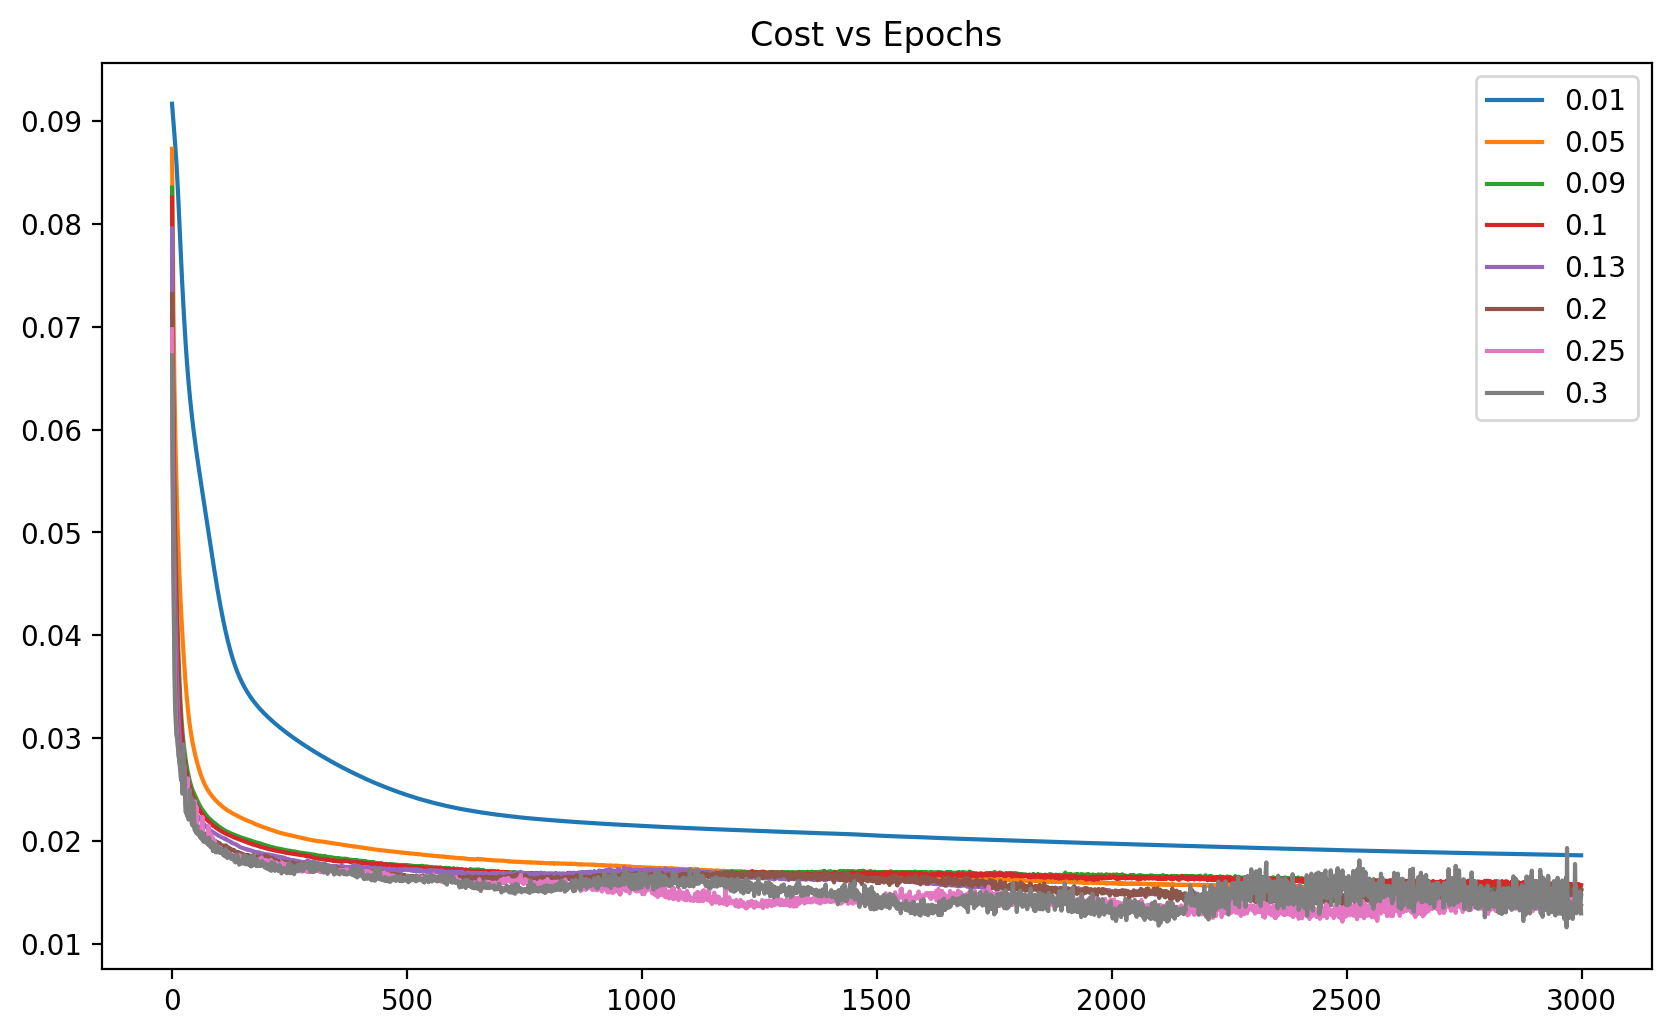

In [12]:
for i in range(len(learning_rates)):
    plt.plot(totalCosts[i])
plt.legend(learning_rates)
plt.title('Cost vs Epochs')
plt.show()

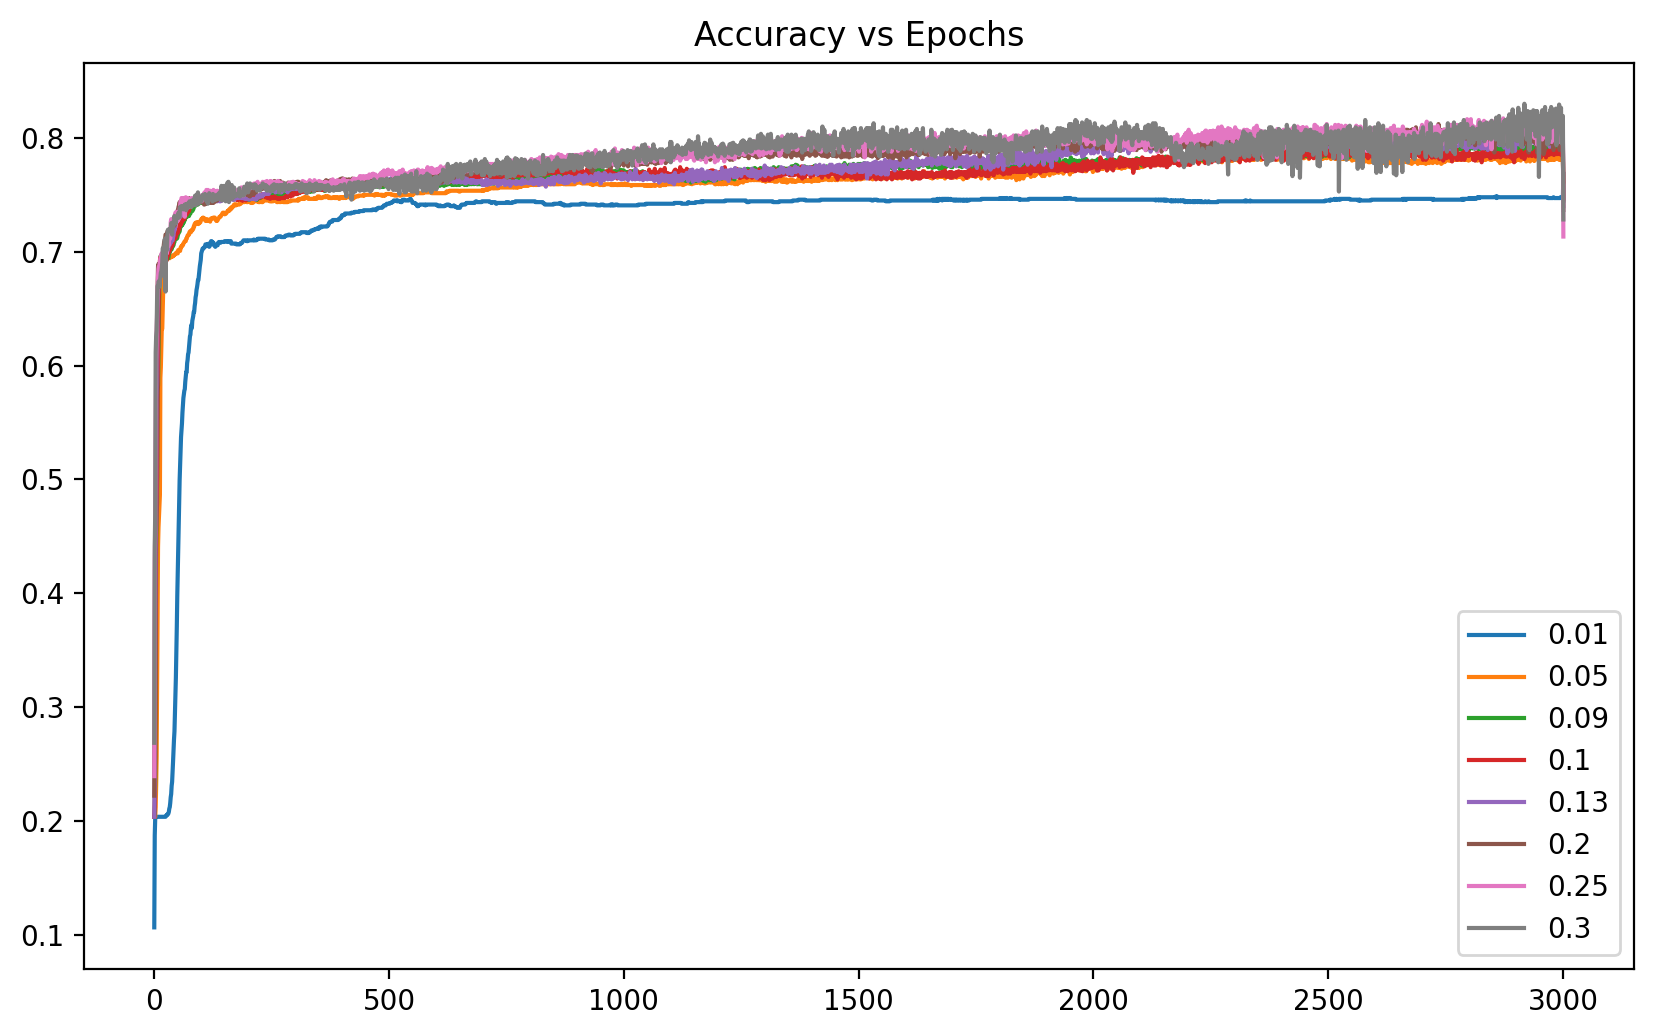

In [13]:
for i in range(len(learning_rates)):
    plt.plot(totalAcc[i])
plt.legend(learning_rates)
plt.title('Accuracy vs Epochs')
plt.show()

In [6]:
activations = ['ReLu', 'TanH', 'LeakyReLu', 'Sigmoid']
totalAcc_2 = []
totalCosts_2 = []
for activation in activations:
    ARCHITECTURE_2 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : 0.13,
        'epochs' : 3000,
        'activation' : activation,
        'initializer' : 'Random',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL2 = DNN(ARCHITECTURE_2['layer_dims'], lRate=ARCHITECTURE_2['lRate'], epochs=ARCHITECTURE_2['epochs']
    ,activation=ARCHITECTURE_2['activation'], initializer=ARCHITECTURE_2['initializer'],
    GD_type=ARCHITECTURE_2['GD_type'], batch_size=ARCHITECTURE_2['batch_size'],
    optimizer=ARCHITECTURE_2['optimizer'], momentum=ARCHITECTURE_2['momentum'],
    regularizer=ARCHITECTURE_2['Regularizer'], regularizer_const=ARCHITECTURE_2['Regularizer_const'])


    costs, acc = MODEL2.fit(X_train, y_train, print_cost=False)
    totalCosts_2.append(costs)
    totalAcc_2.append(acc)
    train_acc = MODEL2.accuracy(X_train, y_train)
    test_acc = MODEL2.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_2, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7828571428571428
Test Acc : 0.7516666666666667
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7842857142857143
Test Acc : 0.7583333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7864285714285715
Test Acc : 0.7533333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7485714285714286
Test Acc : 0.7566666666666667


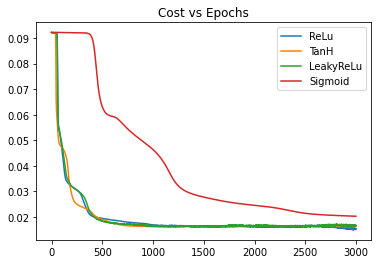

In [7]:
for i in range(len(activations)):
    plt.plot(totalCosts_2[i])
plt.legend(activations)
plt.title('Cost vs Epochs')
plt.show()

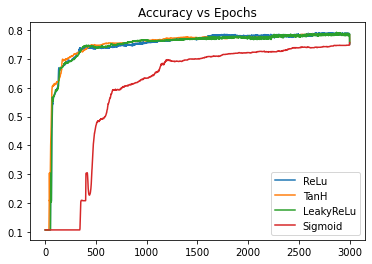

In [8]:
for i in range(len(activations)):
    plt.plot(totalAcc_2[i])
plt.legend(activations)
plt.title('Accuracy vs Epochs')
plt.show()

In [9]:
epochs = [300, 500, 800, 1000, 1500, 1800, 2000, 2500, 3000, 3500, 4000, 8000, 10000, 15000, 20000]
totalAcc_3 = []
totalCosts_3 = []
for epoch in epochs:
    ARCHITECTURE_3 = {
        'layer_dims' : [X_train.shape[0], 64, 32, y_train.shape[0]],
        'lRate' : 0.13,
        'epochs' : epoch,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'MiniBatchGD',
        'batch_size' : 64,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL3 = DNN(ARCHITECTURE_3['layer_dims'], lRate=ARCHITECTURE_3['lRate'], epochs=ARCHITECTURE_3['epochs']
    ,activation=ARCHITECTURE_3['activation'], initializer=ARCHITECTURE_3['initializer'],
    GD_type=ARCHITECTURE_3['GD_type'], batch_size=ARCHITECTURE_3['batch_size'],
    optimizer=ARCHITECTURE_3['optimizer'], momentum=ARCHITECTURE_3['momentum'],
    regularizer=ARCHITECTURE_3['Regularizer'], regularizer_const=ARCHITECTURE_3['Regularizer_const'])


    costs, acc = MODEL3.fit(X_train, y_train, print_cost=False)
    totalCosts_3.append(costs)
    totalAcc_3.append(acc)
    train_acc = MODEL3.accuracy(X_train, y_train)
    test_acc = MODEL3.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_3, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')

('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7564285714285715
Test Acc : 0.7783333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7628571428571429
Test Acc : 0.7683333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7621428571428571
Test Acc : 0.7766666666666666
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b shape : (10, 1)')
Train Acc : 0.7664285714285715
Test Acc : 0.7733333333333333
('Layer 1 W shape : (64, 6)', 'b shape : (64, 1)')
('Layer 2 W shape : (32, 64)', 'b shape : (32, 1)')
('Layer 3 W shape : (10, 32)', 'b

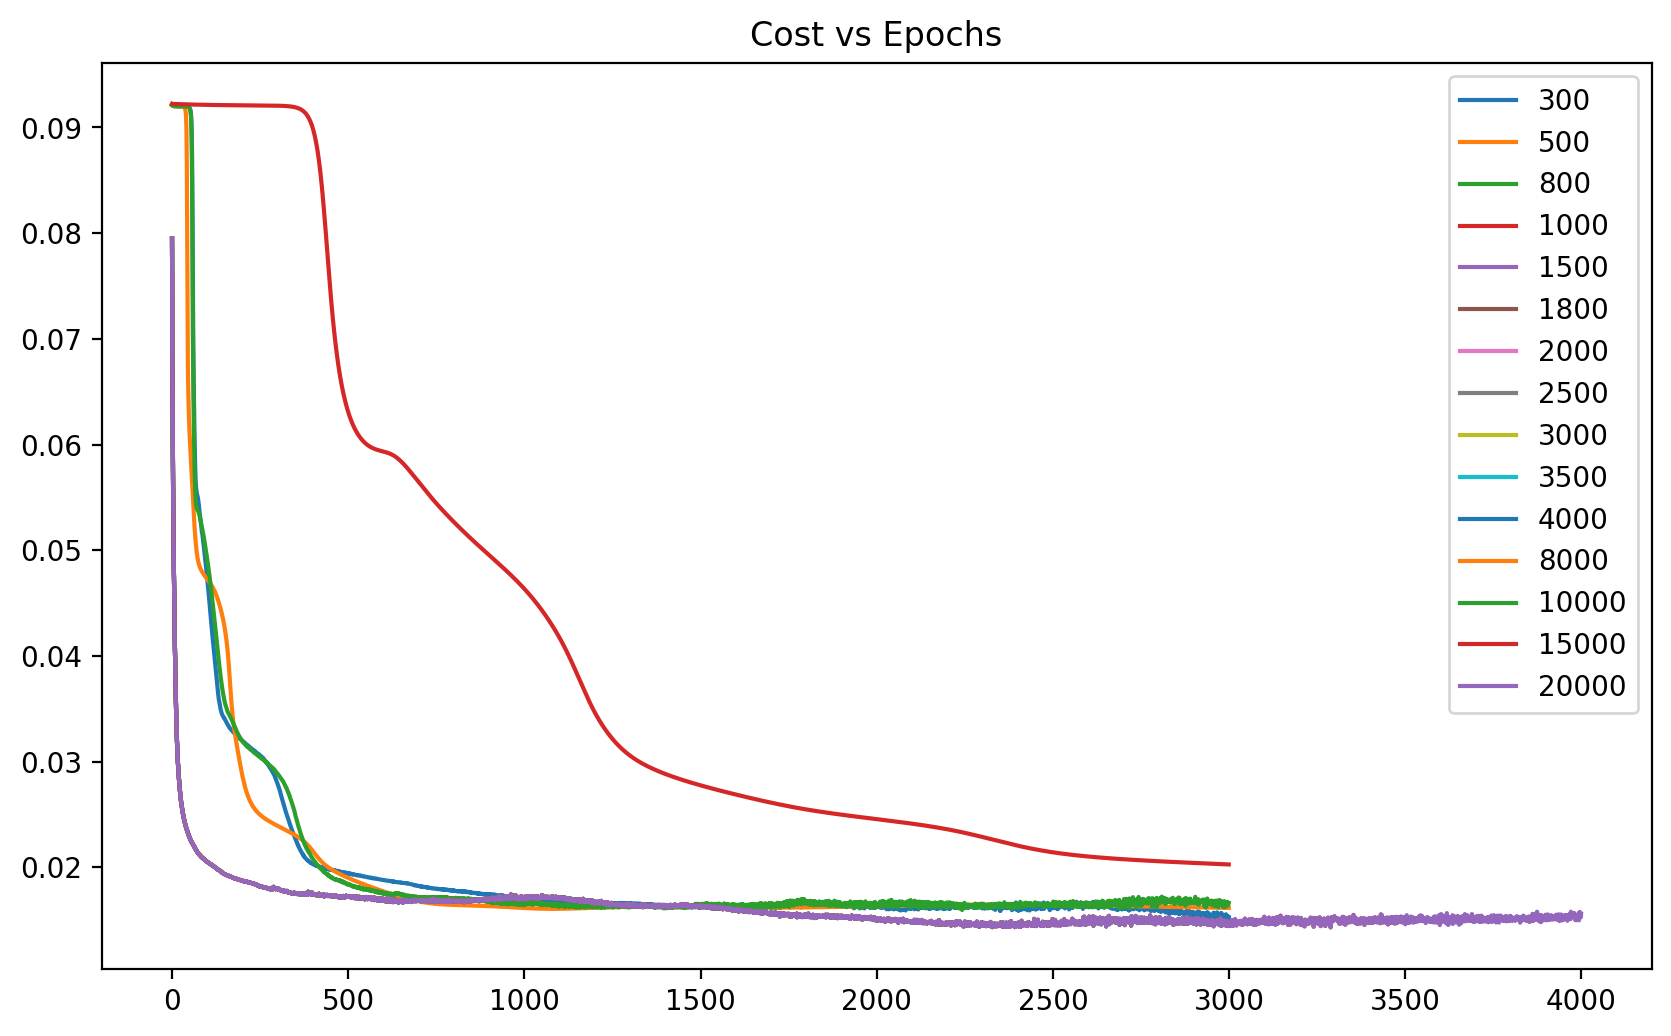

In [21]:
for i in range(len(epochs)):
    plt.plot(totalCosts_2[i])
plt.legend(epochs)
plt.title('Cost vs Epochs')
plt.show()

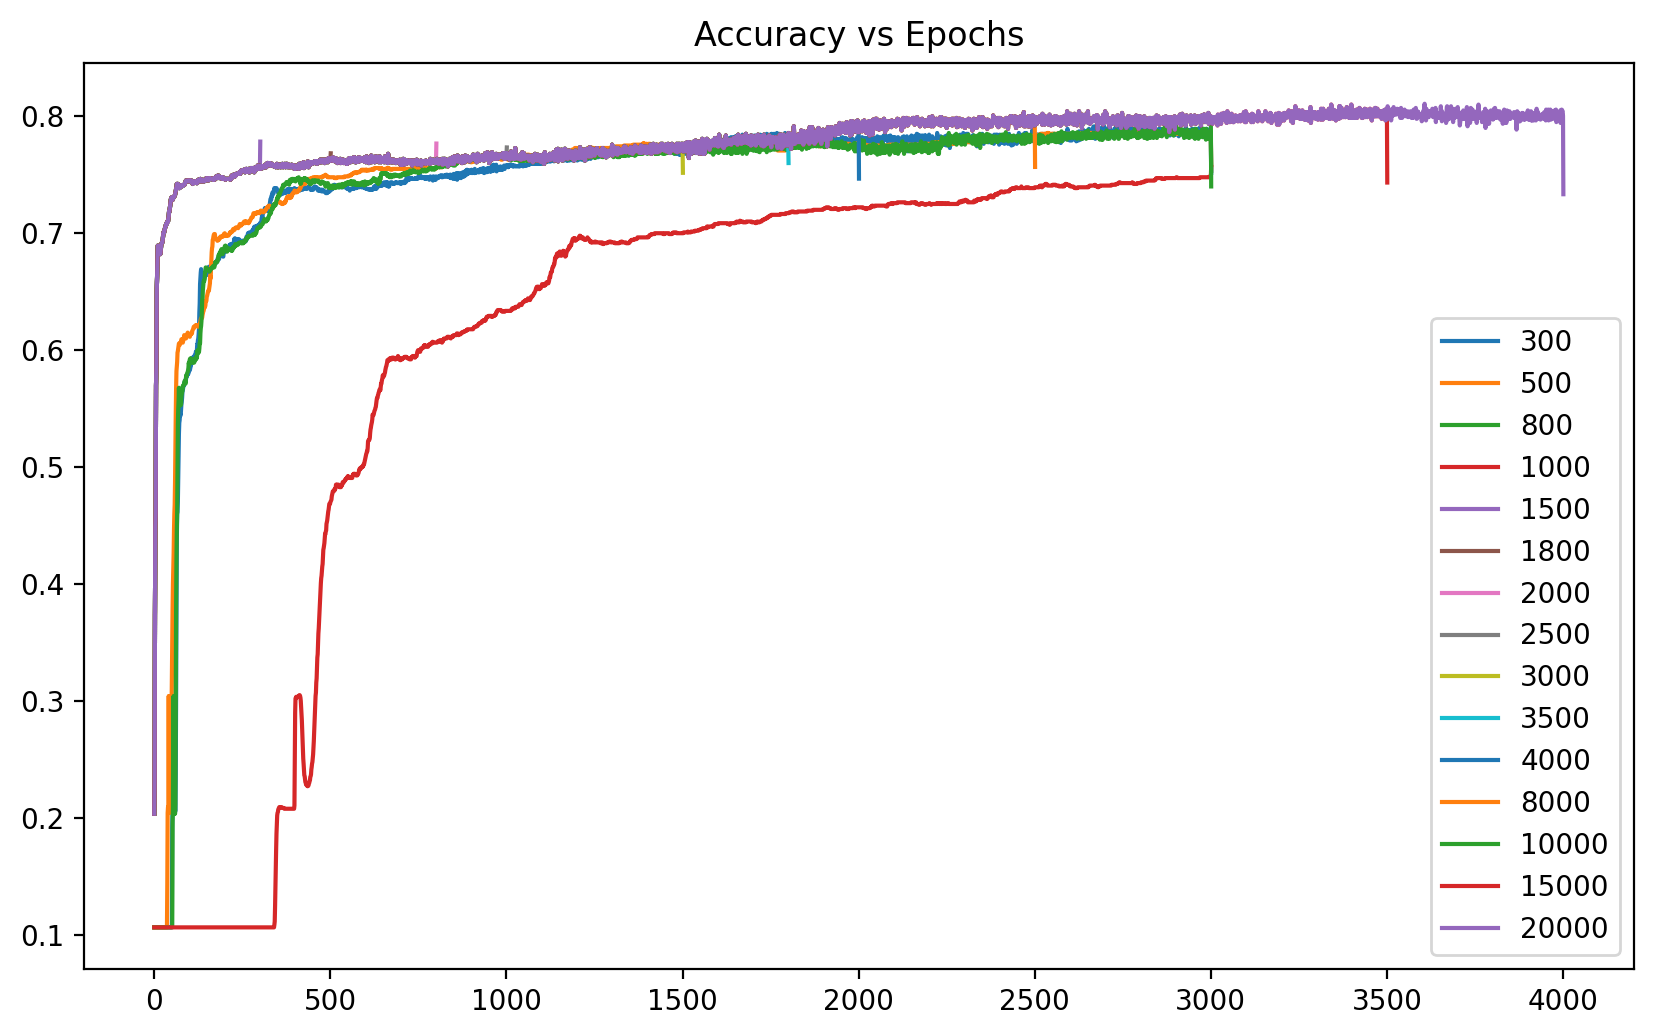

In [22]:
for i in range(len(epochs)):
    plt.plot(totalAcc_2[i])
plt.legend(epochs)
plt.title('Accuracy vs Epochs')
plt.show()

In [ ]:
learning_rates1 = [0.01, 0.09, 0.1, 0.3, 0.19, 0.2, 0.25, 0.3]
totalAcc_4 = []
totalCosts_4 = []
for le in learning_rates1:
    ARCHITECTURE_4 = {
        'layer_dims' : [X_train.shape[0], 64, y_train.shape[0]],
        'lRate' : le,
        'epochs' : 150,
        'activation' : 'ReLu',
        'initializer' : 'He',
        'GD_type' : 'StochasticGD',
        'batch_size' : None,
        'optimizer' : None,
        'momentum' : None,
        'Regularizer' : None,
        'Regularizer_const' : None,
    }
    MODEL4 = DNN(ARCHITECTURE_4['layer_dims'], lRate=ARCHITECTURE_4['lRate'], epochs=ARCHITECTURE_4['epochs']
    ,activation=ARCHITECTURE_4['activation'], initializer=ARCHITECTURE_4['initializer'],
    GD_type=ARCHITECTURE_4['GD_type'], batch_size=ARCHITECTURE_4['batch_size'],
    optimizer=ARCHITECTURE_4['optimizer'], momentum=ARCHITECTURE_4['momentum'],
    regularizer=ARCHITECTURE_4['Regularizer'], regularizer_const=ARCHITECTURE_4['Regularizer_const'])


    costs, acc = MODEL4.fit(X_train, y_train, print_cost=False)
    totalCosts_4.append(costs)
    totalAcc_4.append(acc)
    train_acc = MODEL4.accuracy(X_train, y_train)
    test_acc = MODEL4.accuracy(X_test, y_test)
    SAVE(ARCHITECTURE_4, train_acc, test_acc, 'report')
    print(f'Train Acc : {train_acc}')
    print(f'Test Acc : {test_acc}')